# Notebook to Perform Data Cleaning and Sorting for Visualization

In [22]:
import pandas as pd
import glob
from collections import Counter
import os
import matplotlib.pyplot as plt

## Sort Into Decades

In [107]:
decade_count = "2"
decade = f"20{decade_count}"
full_decade = f"{decade}0"

dir_path = f"./by_decade_data/{full_decade}"

os.makedirs(dir_path, exist_ok=True)

In [108]:
csv_files = glob.glob(f"./by_year_data/{decade}*.csv")

csv_files.sort()

for file in csv_files:
    print(f"- {file}")

- ./by_year_data/2020_music_data.csv
- ./by_year_data/2021_music_data.csv
- ./by_year_data/2022_music_data.csv
- ./by_year_data/2023_music_data.csv
- ./by_year_data/2024_music_data.csv


In [109]:
dfs = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)

print(f"Number of lines in combined df:", len(combined_df))

Number of lines in combined df: 500


In [110]:
combined_name = f"{dir_path}/{full_decade}s_data.csv"
combined_df.to_csv(combined_name, index=False)


print(f"\nSuccessfully merged {len(csv_files)} files into {combined_name}")


Successfully merged 5 files into ./by_decade_data/2020/2020s_data.csv


## Extract Popular Artists by Decade

In [111]:
artist_counts = Counter()

combined_df["Artists"] = combined_df["Artists"].fillna("").astype(str)

for artists in combined_df["Artists"]:
    artists_list = [artists.strip() for artists in artists.split(",")]
    artist_counts.update(artists_list)


artist_df = pd.DataFrame(artist_counts.items(), columns=["Artist", "Count"]).sort_values(by="Count", ascending=False)

artist_df

,Artist,Count
7,Drake,23
34,Morgan Wallen,20
11,Doja Cat,19
21,Justin Bieber,13
85,Luke Combs,13
...,...,...
144,Thomas Rhett,1
145,Keith Urban,1
147,Duncan Laurence,1
148,Niko Moon,1


In [112]:
artist_df.to_csv(f"{dir_path}/artist_data.csv")

## Extract Popular Genres by Decade

In [113]:
genre_counts = Counter()

for genre in combined_df["Genres"]:
    genre_list = [genre.strip() for genre in genre.split(",")]
    genre_counts.update(genre_list)


genres_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

genres_df

,Genre,Count
5,country,121
1,hip hop,106
3,pop,90
4,rap,39
0,r&b,33
...,...,...
71,nepo baby,1
72,jazz,1
73,latin alternative,1
74,soul,1


In [114]:
genres_df.to_csv(f"{dir_path}/genre_data.csv")

## Plot by Genre Trends Over Time

In [13]:
genre_colors = {
    "Pop": "#D81B60",  # Pink
    "Rock/Metal": "#2ed1e8",  # Blue
    "Hip Hop": "#6A1B9A",  # Purple
    "R&B": "#FFC107",  # Yellow
    "Country": "#43A047",  # Green
    "Electronic": "#E53935",  # Red
    "Jazz": "#8E24AA",  # Dark Purple
    "Latin": "#F4511E",  # Orange
    "Blues": "#1565C0",  # Dark Blue
    "Classical": "#795548",  # Brown
}

FONTSIZE = 20

<Figure size 1400x700 with 0 Axes>

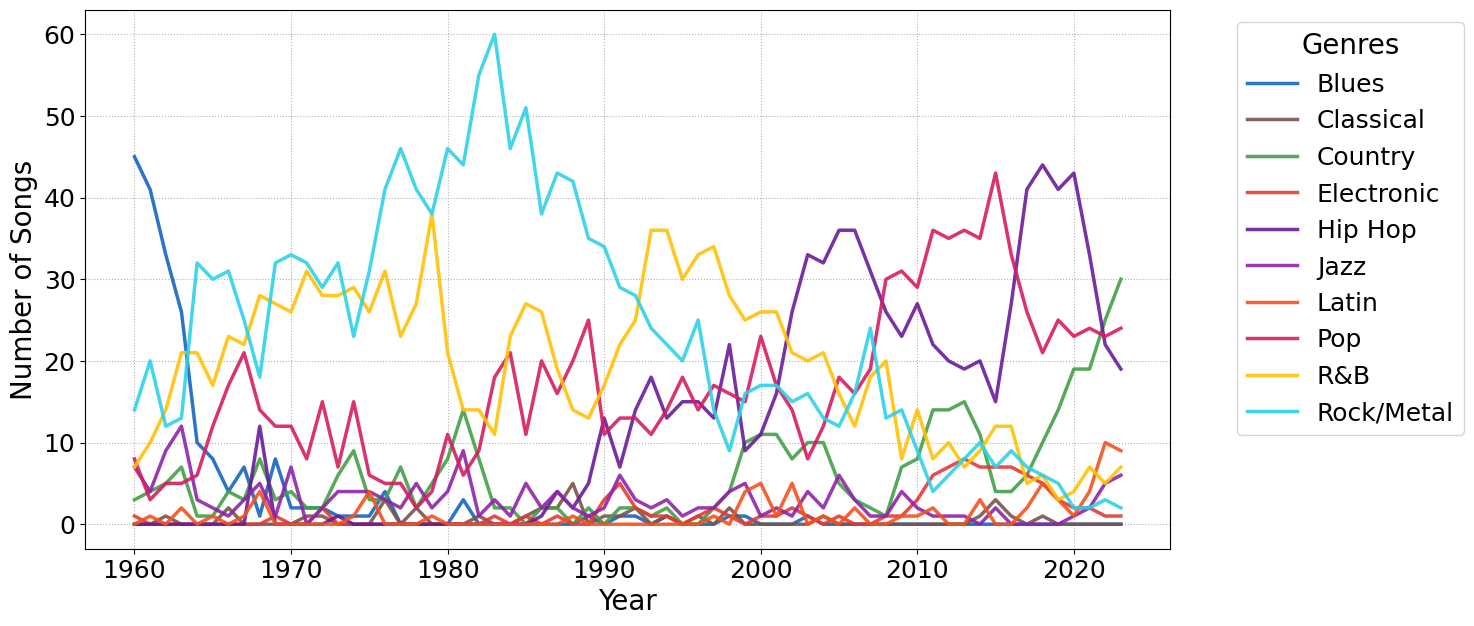

In [ ]:
genre_trends = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)

    if "Main Genre" in df.columns:
        genre_counts = df["Main Genre"].value_counts().reset_index()
        genre_counts.columns = ["Genre", "Count"]
        genre_counts["Year"] = year

        genre_trends.append(genre_counts)

genre_trends_df = pd.concat(genre_trends, ignore_index=True)
genre_trends_df = genre_trends_df[~genre_trends_df["Genre"].isin(["Traditional music", "New age", "Easy listening", "Folk/Acoustic", "Unknown"])] # These categories don't do much except make messy

genre_trends_df["Genre"] = genre_trends_df["Genre"].replace({"Metal": "Rock/Metal", "Rock": "Rock/Metal"})

genre_trends_df = genre_trends_df.groupby(["Year", "Genre"], as_index=False).sum()

pivot_df = genre_trends_df.pivot(index="Year", columns="Genre", values="Count").fillna(0)

plt.figure(figsize=(14, 7))

ax = pivot_df.plot(kind="line", linewidth=2.5, figsize=(14, 7), alpha=0.9, 
                   color=[genre_colors.get(genre, "gray") for genre in pivot_df.columns])

plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Number of Songs", fontsize=FONTSIZE)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title="Genres", title_fontsize=FONTSIZE, bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18)

plt.show()

let's look only at 0 to 10 to see if the genres are worth keeping and keep filtering above plot for readability

<Figure size 1200x600 with 0 Axes>

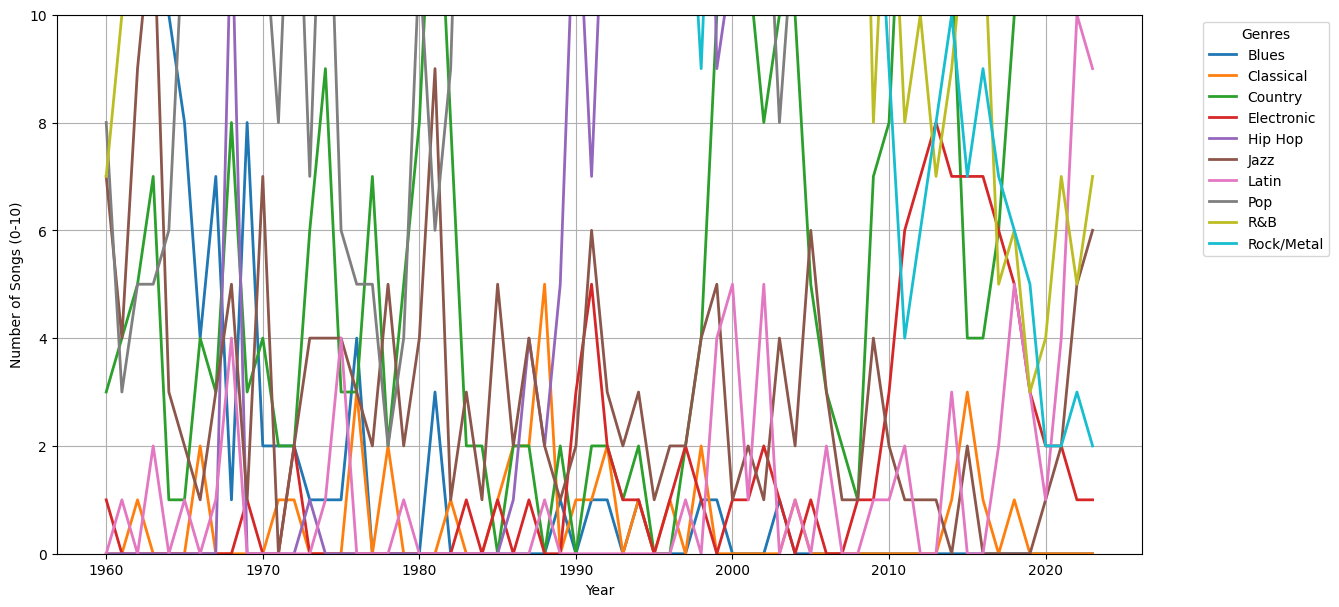

In [34]:
plt.figure(figsize=(12, 6))
pivot_df.plot(kind="line", linewidth=2, figsize=(14, 7))
plt.ylim(0, 10)
plt.xlabel("Year")
plt.ylabel("Number of Songs (0-10)")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

Try smoothing out graph:

<Figure size 1200x600 with 0 Axes>

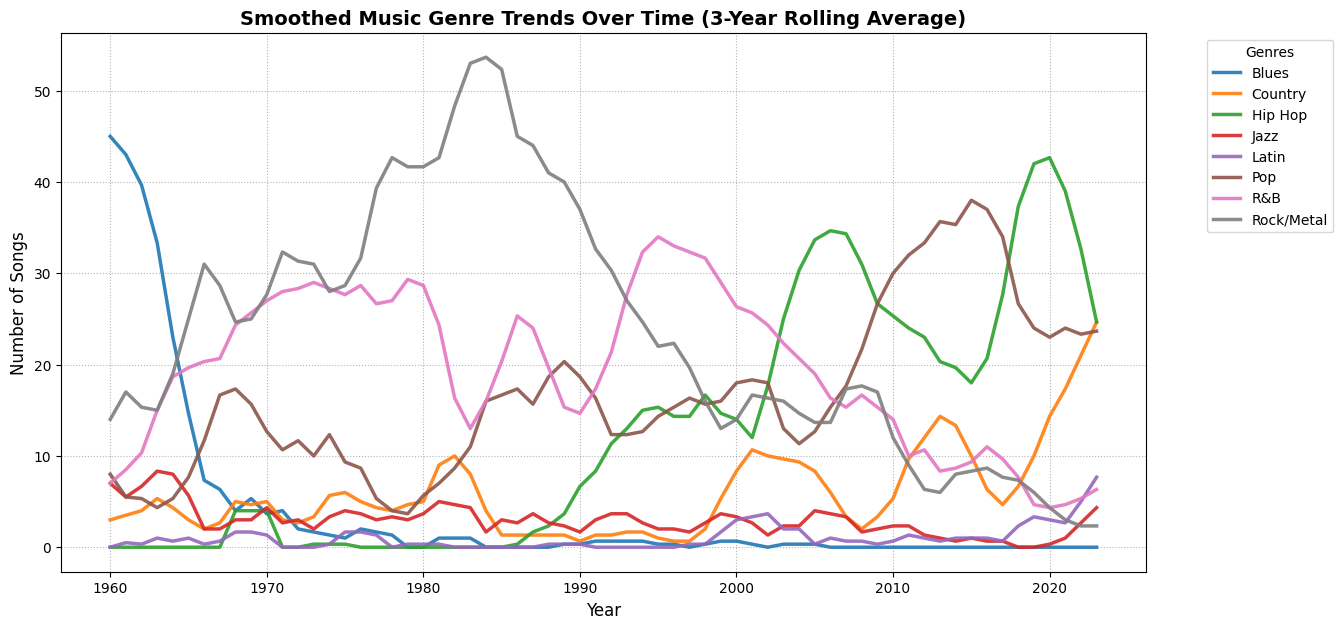

In [ ]:
pivot_smoothed = pivot_df.rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(12, 6))
pivot_smoothed.plot(kind="line", linewidth=2.5, figsize=(14, 7), alpha=0.9)

plt.title("Smoothed Music Genre Trends Over Time (3-Year Rolling Average)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()

Plot with Heatmap instead:

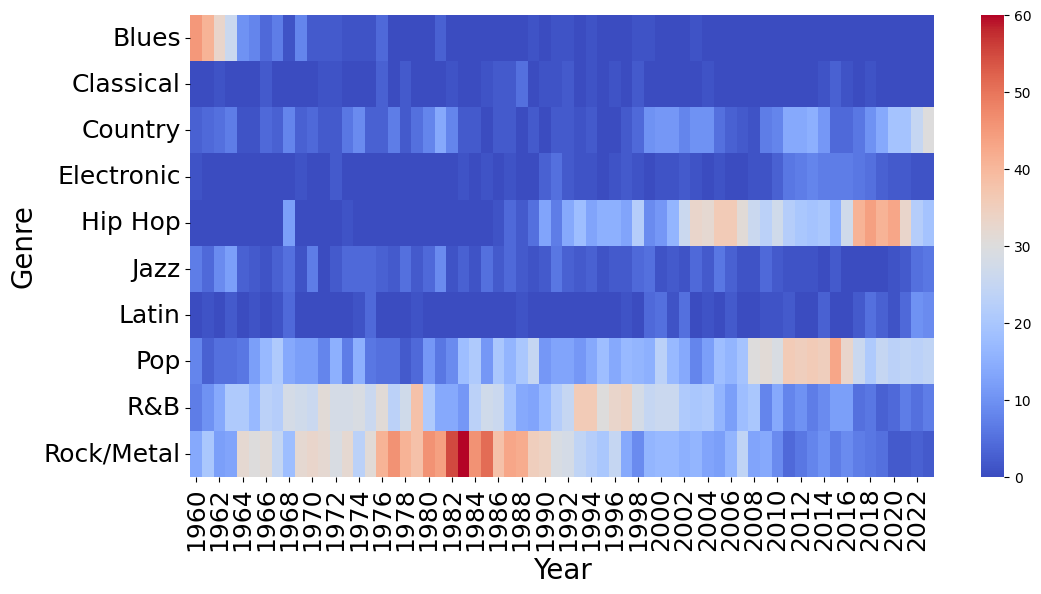

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df.T, cmap="coolwarm", linewidths=0, annot=False)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Genre", fontsize=FONTSIZE)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

## Extract Explicit vs. Non-Explicit Trend

First try by percentage (Explicit / Total Song Count):

<Figure size 1200x600 with 0 Axes>

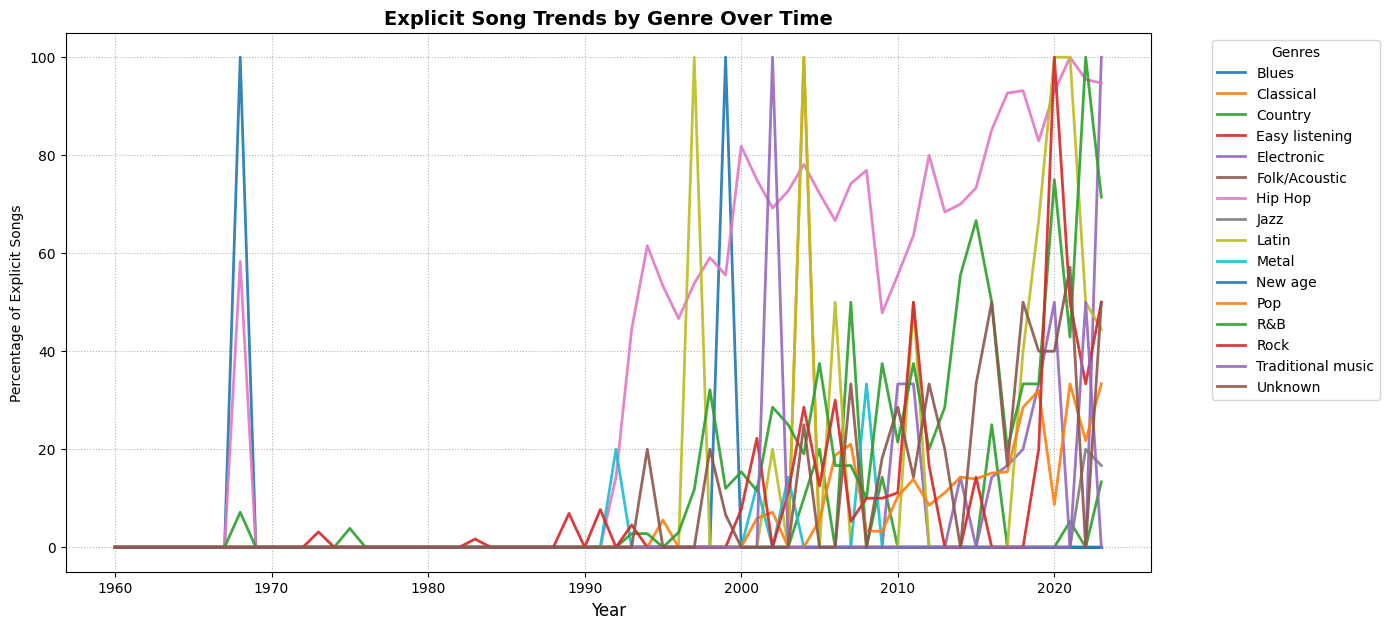

In [ ]:
genre_explicit_counts = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

   
    df = pd.read_csv(file_path)

    if "Explicit" in df.columns and "Main Genre" in df.columns:
   
        explicit_counts = df.groupby("Main Genre")["Explicit"].sum().reset_index()
        total_counts = df["Main Genre"].value_counts().reset_index()

        explicit_counts.columns = ["Genre", "Explicit Songs"]
        total_counts.columns = ["Genre", "Total Songs"]

        genre_data = explicit_counts.merge(total_counts, on="Genre", how="right").fillna(0)
        genre_data["Year"] = year

        genre_explicit_counts.append(genre_data)

genre_explicit_df = pd.concat(genre_explicit_counts, ignore_index=True)

genre_explicit_df["Explicit %"] = (genre_explicit_df["Explicit Songs"] / genre_explicit_df["Total Songs"]) * 100

explicit_pivot_df = genre_explicit_df.pivot(index="Year", columns="Genre", values="Explicit %").fillna(0)

plt.figure(figsize=(12, 6))
explicit_pivot_df.plot(kind="line", linewidth=2, figsize=(14, 7), alpha=0.9)

plt.title("Explicit Song Trends by Genre Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Explicit Songs")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()

Show instead by total # of songs per year:

<Figure size 1200x600 with 0 Axes>

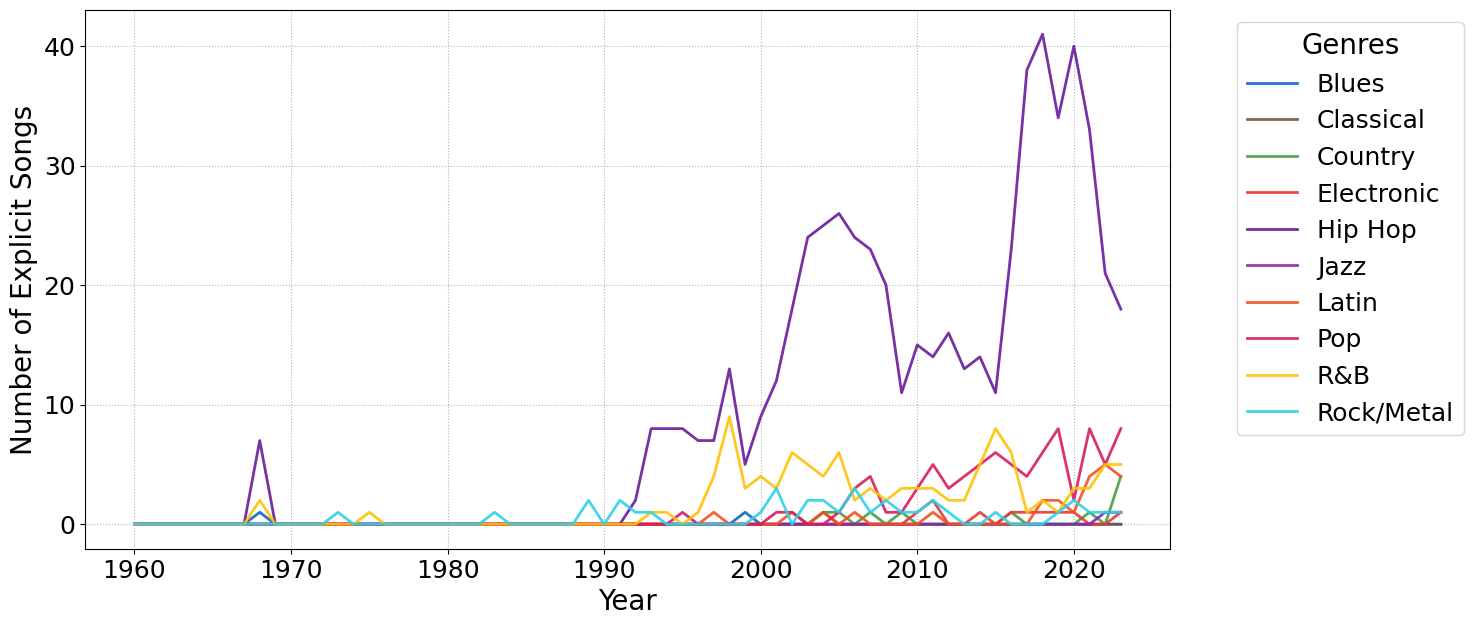

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Define genres to exclude
excluded_genres = ["Traditional music", "New age", "Easy listening", "Folk/Acoustic", "Unknown"]


# Initialize storage
genre_explicit_counts = []

# Loop through each year
for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    try:
        # Load data
        df = pd.read_csv(file_path)

        # Ensure necessary columns exist
        if "Explicit" in df.columns and "Main Genre" in df.columns:
            # Remove excluded genres
            df = df[~df["Main Genre"].isin(["Traditional music", "New age", "Easy listening", "Folk/Acoustic", "Unknown"])]

            # Count explicit songs per genre
            explicit_counts = df.groupby("Main Genre")["Explicit"].sum().reset_index()

            # Rename columns
            explicit_counts.columns = ["Genre", "Explicit Songs"]
            explicit_counts["Year"] = year  # Add year column

            # Store results
            genre_explicit_counts.append(explicit_counts)

    except FileNotFoundError:
        print(f"⚠️ Skipping {year}: File not found.")

genre_explicit_df = pd.concat(genre_explicit_counts, ignore_index=True)

# Merge "Metal" and "Rock" into "Rock/Metal"
genre_explicit_df["Genre"] = genre_explicit_df["Genre"].replace({"Metal": "Rock/Metal", "Rock": "Rock/Metal"})

# ✅ Ensure each (Year, Genre) pair is unique by summing explicit song counts
genre_explicit_df = genre_explicit_df.groupby(["Year", "Genre"], as_index=False)["Explicit Songs"].sum()

# Pivot data for plotting (Years as index, Genres as columns)
explicit_pivot_df = genre_explicit_df.pivot(index="Year", columns="Genre", values="Explicit Songs").fillna(0)

# 📈 Plot the Number of Explicit Songs per Genre Over Time
plt.figure(figsize=(12, 6))
explicit_pivot_df.plot(kind="line", linewidth=2, figsize=(14, 7), alpha=0.9, color=[genre_colors.get(genre, "gray") for genre in pivot_df.columns])

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Number of Explicit Songs", fontsize=FONTSIZE)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=FONTSIZE)
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()

## Plot By Song Duration

<Figure size 1200x600 with 0 Axes>

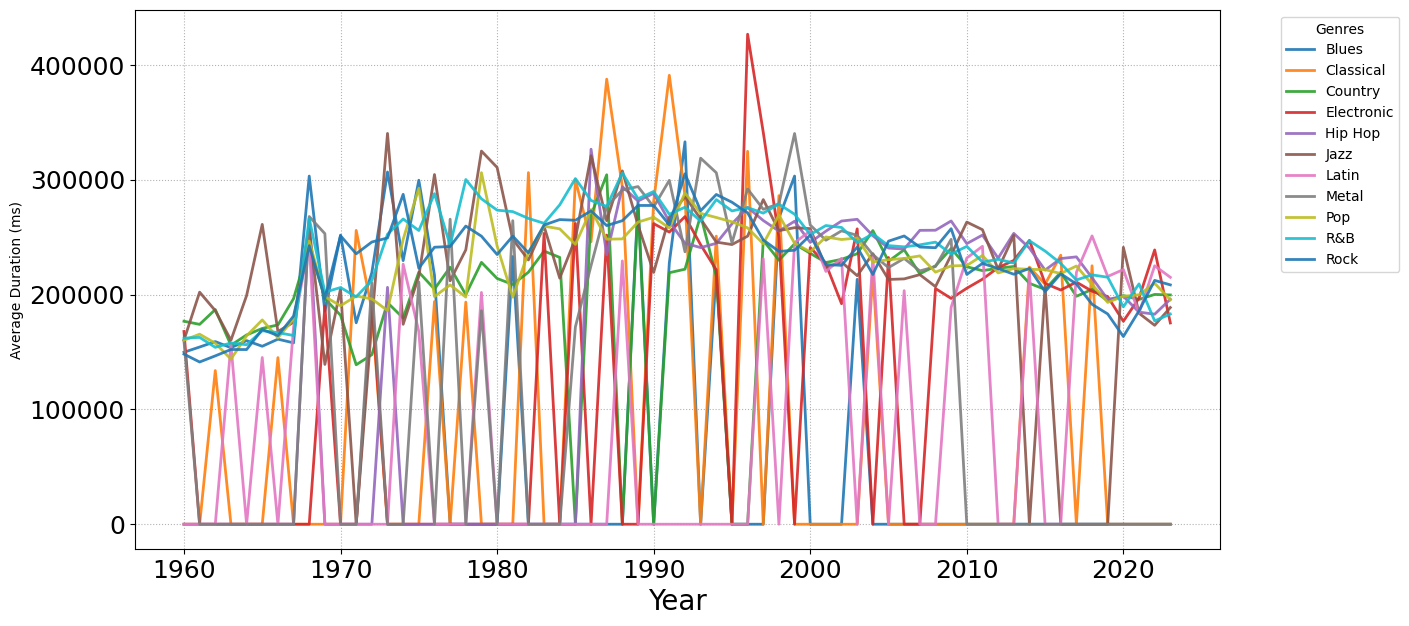

In [38]:
excluded_genres = ["Traditional music", "New age", "Easy listening", "Folk/Acoustic", "Unknown"]

genre_duration_data = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)

    if "Duration (ms)" in df.columns and "Main Genre" in df.columns:

        df = df[~df["Main Genre"].isin(excluded_genres)]

        duration_avg = df.groupby("Main Genre")["Duration (ms)"].mean().reset_index()

        duration_avg.columns = ["Genre", "Average Duration (ms)"]
        duration_avg["Year"] = year

        genre_duration_data.append(duration_avg)

genre_duration_df = pd.concat(genre_duration_data, ignore_index=True)

duration_pivot_df = genre_duration_df.pivot(index="Year", columns="Genre", values="Average Duration (ms)").fillna(0)

plt.figure(figsize=(12, 6))
duration_pivot_df.plot(kind="line", linewidth=2, figsize=(14, 7), alpha=0.9)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Average Duration (ms)")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()


Try instead with bargraph:

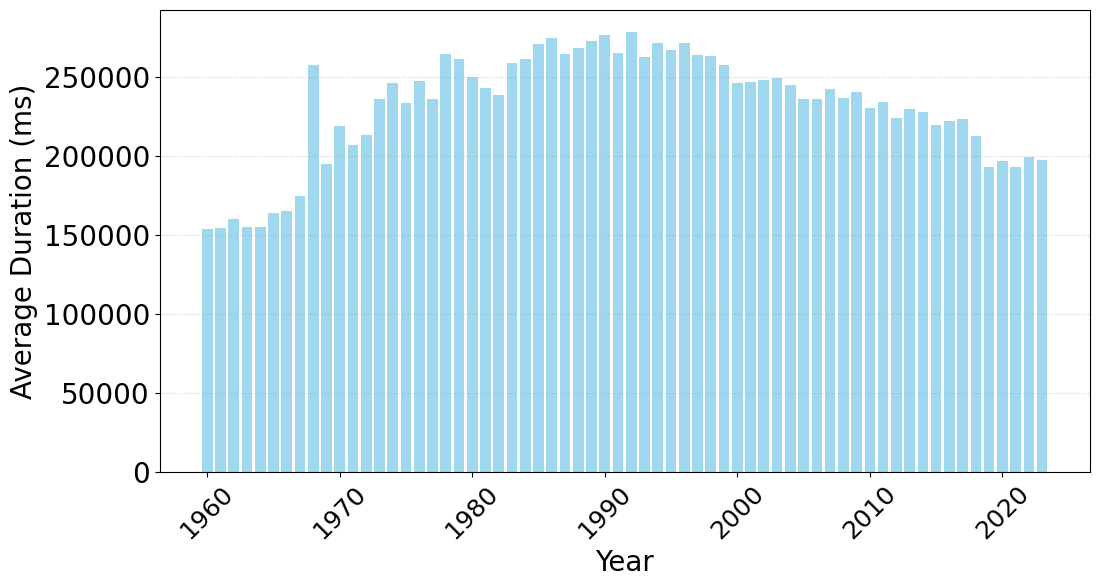

In [40]:
yearly_duration_data = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)

    if "Duration (ms)" in df.columns:

        avg_duration = df["Duration (ms)"].mean()
        
        yearly_duration_data.append({"Year": year, "Average Duration (ms)": avg_duration})

yearly_duration_df = pd.DataFrame(yearly_duration_data)

plt.figure(figsize=(12, 6))
plt.bar(yearly_duration_df["Year"], yearly_duration_df["Average Duration (ms)"], color="skyblue", alpha=0.8)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Average Duration (ms)", fontsize=FONTSIZE)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=FONTSIZE)
plt.grid(axis="y", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()


## Plot by International Songs

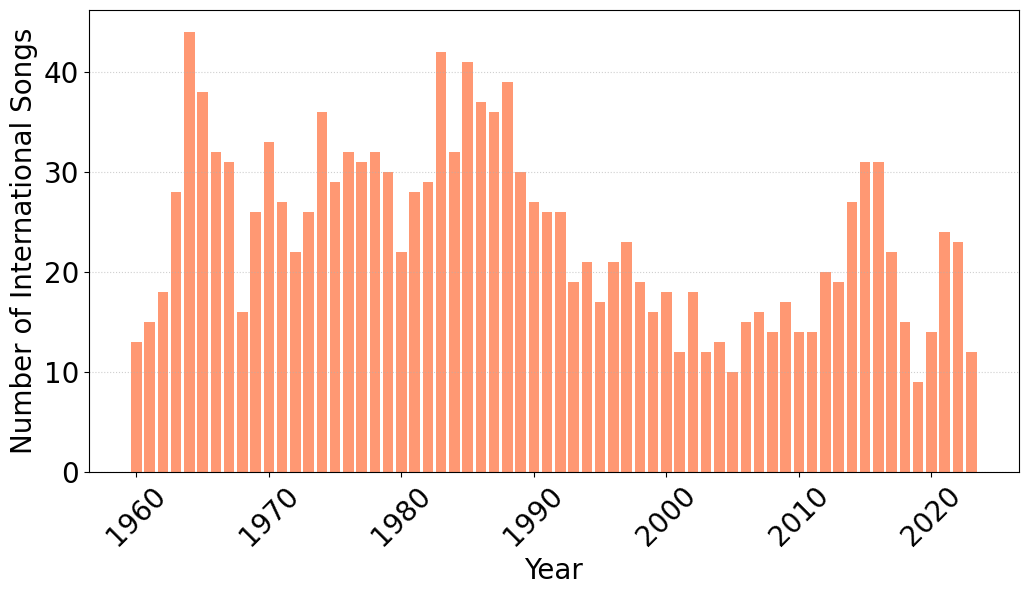

In [42]:
yearly_international_data = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)

    if "Artist Country" in df.columns:
        total_songs = len(df)

        international_count = df["Artist Country"].apply(lambda x: "US" not in str(x) and "Unknown" not in str(x)).sum()

        yearly_international_data.append({"Year": year, "International Songs": international_count})


yearly_international_df = pd.DataFrame(yearly_international_data)

plt.figure(figsize=(12, 6))
plt.bar(yearly_international_df["Year"], yearly_international_df["International Songs"], color="coral", alpha=0.8)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Number of International Songs", fontsize=FONTSIZE)
plt.xticks(rotation=45, fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.grid(axis="y", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()


Since we can't observe which country international songs come from, let's sort contribution based on country. Initially, the legend was overloaded with countries, so I mapped countries to continent by hand, and then graphed by continent:

In [ ]:
continent_mapping = {
    "US": "North America", "CA": "North America", "MX": "North America",
    "JM": "North America", "PR": "North America", "BS": "North America", 
    "VC": "North America", "VG": "North America", "BB": "North America",
    "CU": "North America",
    "BR": "South America", "AR": "South America", "CO": "South America",
    "GB": "Europe", "FR": "Europe", "DE": "Europe", "IT": "Europe", "ES": "Europe",
    "NL": "Europe", "DK": "Europe", "SE": "Europe", "FI": "Europe", "IE": "Europe",
    "AT": "Europe", "GR": "Europe", "CH": "Europe", "NO": "Europe", "BE": "Europe",
    "LU": "Europe", "XG": "Europe", "RO": "Europe", "IS": "Europe",
    "IN": "Asia", "JP": "Asia", "KR": "Asia", "CN": "Asia", "RU": "Asia",
    "PH": "Asia",
    "NG": "Africa", "ZA": "Africa", "DZ": "Africa", "SN": "Africa",
    "AU": "Oceania", "NZ": "Oceania",
}

continent_colors = {
    "North America": "#1f77b4",  # Blue
    "South America": "#ff7f0e",  # Orange
    "Europe": "#2ca02c",  # Green
    "Asia": "#d62728",  # Red
    "Africa": "#9467bd",  # Purple
    "Oceania": "#8c564b",  # Brown
}

<Figure size 1400x700 with 0 Axes>

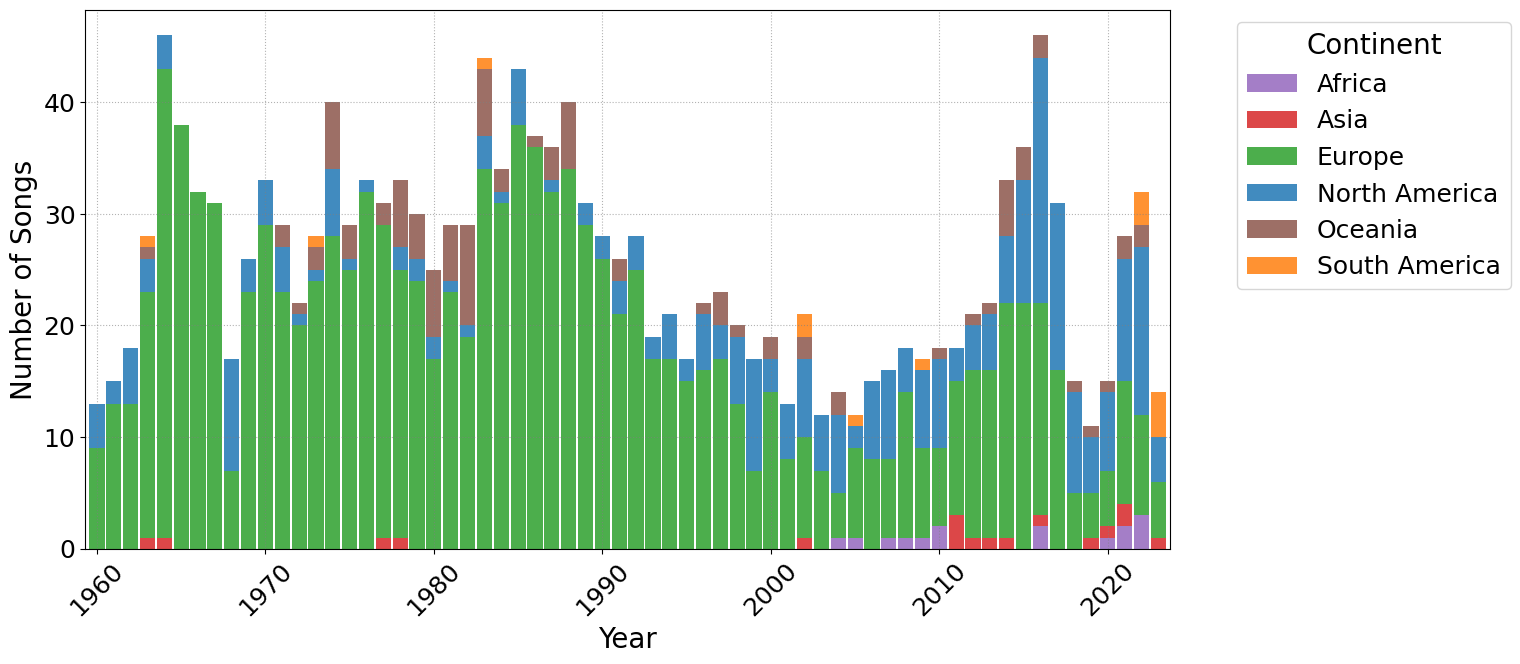

In [47]:
international_counts = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)

    if "Artist Country" in df.columns:

        df = df[df["Artist Country"].apply(lambda x: "US" not in str(x) and "Unknown" not in str(x))]

        df = df.assign(Country=df["Artist Country"].str.split(", ")).explode("Country")

        df["Continent"] = df["Country"].map(continent_mapping).fillna("Other")

        continent_counts = df["Continent"].value_counts().reset_index()
        continent_counts.columns = ["Continent", "Song Count"]
        continent_counts["Year"] = year

        international_counts.append(continent_counts)

international_df = pd.concat(international_counts, ignore_index=True)

pivot_df = international_df.pivot(index="Year", columns="Continent", values="Song Count").fillna(0)

plt.figure(figsize=(14, 7))
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(14, 7), width=0.9, alpha=0.85, color=[continent_colors.get(continent, "gray") for continent in pivot_df.columns])

tick_positions = [i for i, year in enumerate(pivot_df.index) if year % 10 == 0]
tick_labels = [str(year) for year in pivot_df.index if year % 10 == 0]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Number of Songs", fontsize=FONTSIZE)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=FONTSIZE)
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()

## Plot by Popularity Score

Popularity score is NOT popularity of the song at the time Billboard Year-End Hot 100 was created. Instead, it is the current Spotify API popularity scored marked from 0 to 100. By looking at this value, we can see the longevity of older songs and how they hold up over time!

<Figure size 1200x600 with 0 Axes>

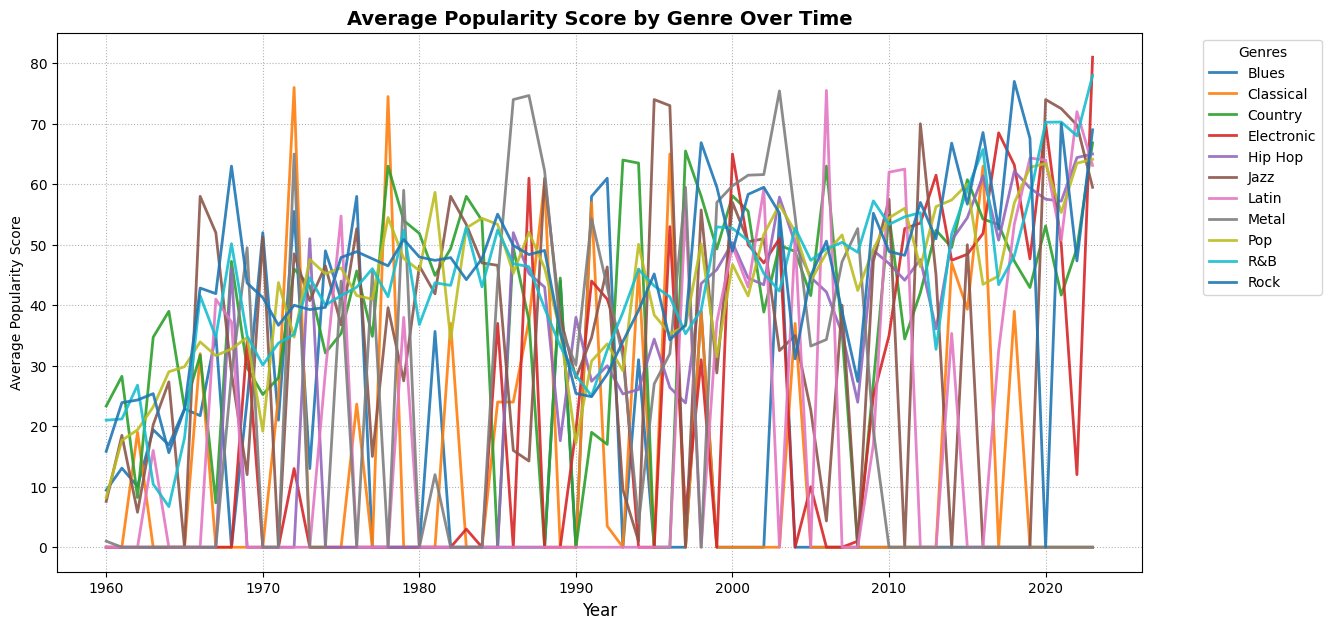

In [48]:
excluded_genres = ["Traditional music", "New age", "Easy listening", "Folk/Acoustic", "Unknown"]

genre_popularity_data = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)
    
    if "Popularity" in df.columns and "Main Genre" in df.columns:
        
        df = df[~df["Main Genre"].isin(excluded_genres)]

        genre_avg_popularity = df.groupby("Main Genre")["Popularity"].mean().reset_index()

        genre_avg_popularity.columns = ["Genre", "Average Popularity"]
        genre_avg_popularity["Year"] = year

        genre_popularity_data.append(genre_avg_popularity)

genre_popularity_df = pd.concat(genre_popularity_data, ignore_index=True)

popularity_pivot_df = genre_popularity_df.pivot(index="Year", columns="Genre", values="Average Popularity").fillna(0)

plt.figure(figsize=(12, 6))
popularity_pivot_df.plot(kind="line", linewidth=2, figsize=(14, 7), alpha=0.9)

plt.title("Average Popularity Score by Genre Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Popularity Score")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()


Looks disgusting, so let's try to graph by all genres:

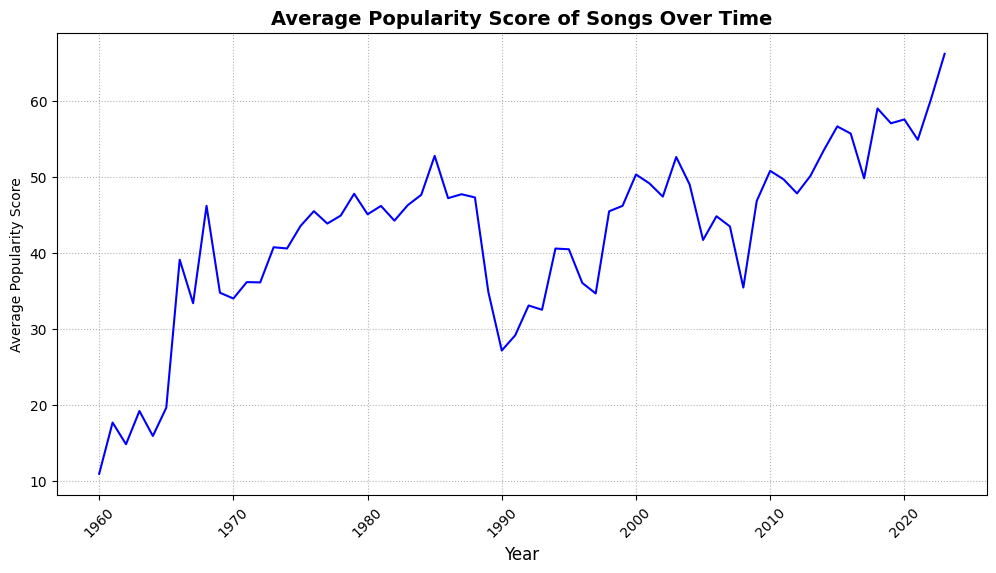

In [67]:
yearly_popularity_data = []

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"


    df = pd.read_csv(file_path)

    if "Popularity" in df.columns:

        avg_popularity = df["Popularity"].mean()
        

        yearly_popularity_data.append({"Year": year, "Average Popularity": avg_popularity})

yearly_popularity_df = pd.DataFrame(yearly_popularity_data)

plt.figure(figsize=(12, 6))
plt.plot(yearly_popularity_df["Year"], yearly_popularity_df["Average Popularity"],linestyle="-", color="blue", label="Average Popularity")

plt.title("Average Popularity Score of Songs Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Popularity Score")
plt.xticks(rotation=45)
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()


Looks great! But, we can input in some more data. Let's preserve it by adding the most popular song of each decade and the year they hit Hot 100:

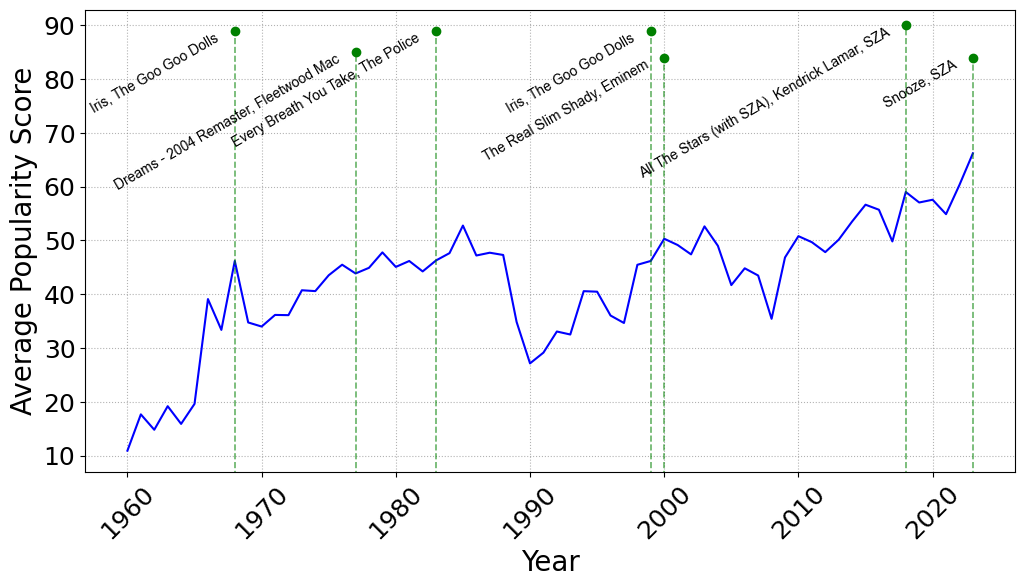

In [82]:
yearly_popularity_data = []
most_popular_songs_by_decade = {}

for year in range(1960, 2024):
    file_path = f"./by_year_data/{year}_music_data.csv"

    df = pd.read_csv(file_path)

    if "Popularity" in df.columns and "Track Name" in df.columns and "Artists" in df.columns:

        avg_popularity = df["Popularity"].mean()
        
        most_popular_row = df.loc[df["Popularity"].idxmax()]
        
        decade = (year // 10) * 10  

        if decade not in most_popular_songs_by_decade or most_popular_row["Popularity"] > most_popular_songs_by_decade[decade]["Popularity"]:
            most_popular_songs_by_decade[decade] = {
                "Year": year,
                "Popularity": most_popular_row["Popularity"],
                "Track Name": most_popular_row["Track Name"],
                "Artists": most_popular_row["Artists"]
            }

        yearly_popularity_data.append({"Year": year, "Average Popularity": avg_popularity})

yearly_popularity_df = pd.DataFrame(yearly_popularity_data)
most_popular_songs_df = pd.DataFrame(most_popular_songs_by_decade.values())

plt.figure(figsize=(12, 6))
plt.plot(yearly_popularity_df["Year"], yearly_popularity_df["Average Popularity"], linestyle="-", color="blue", label="Average Popularity")

for i, row in most_popular_songs_df.iterrows():
    plt.scatter(row["Year"], row["Popularity"], color="green", zorder=3)
    
    plt.ylim(plt.ylim())

    label_text = f"{row['Track Name']}, {row['Artists']}"

    plt.vlines(x=row["Year"], ymin=6, ymax=row["Popularity"], color="green", linestyle="dashed", linewidth=1.2, alpha=0.6)

    plt.text(row["Year"] - 1, row["Popularity"], label_text, 
         fontsize=10, ha='right', va='top', color="black", fontname="Arial", rotation=30)

plt.xlabel("Year", fontsize=FONTSIZE)
plt.ylabel("Average Popularity Score",fontsize=FONTSIZE)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=45)
plt.grid(color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.show()